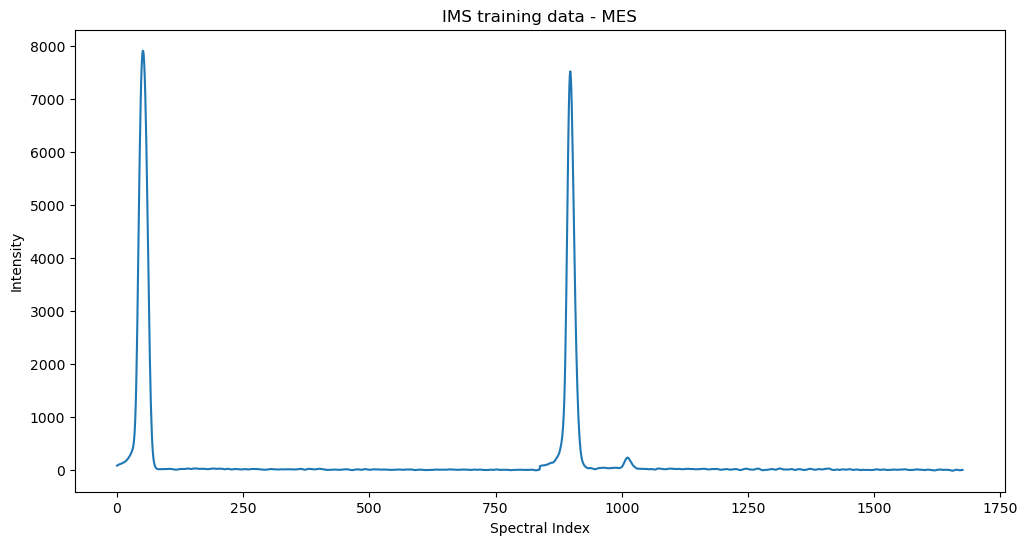

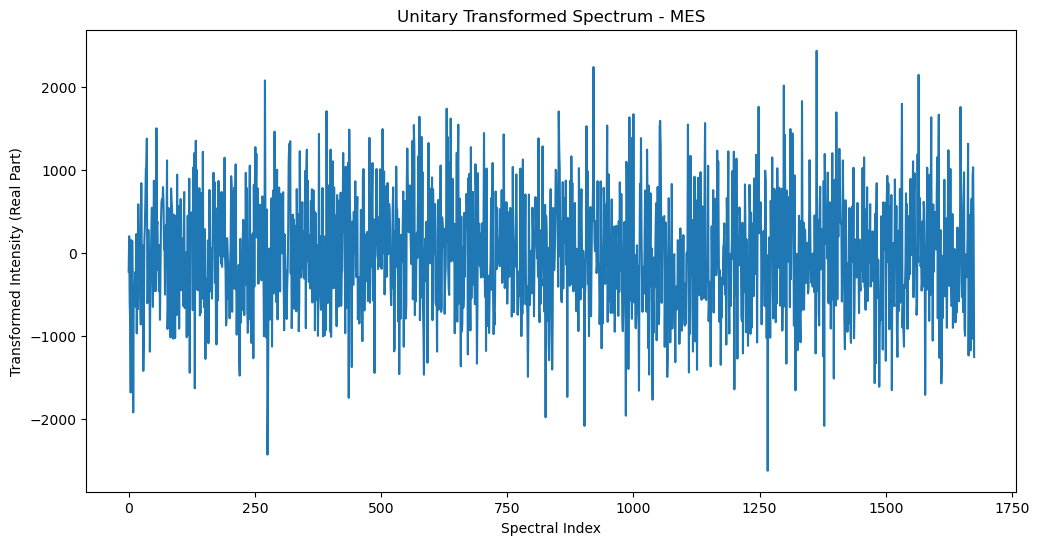

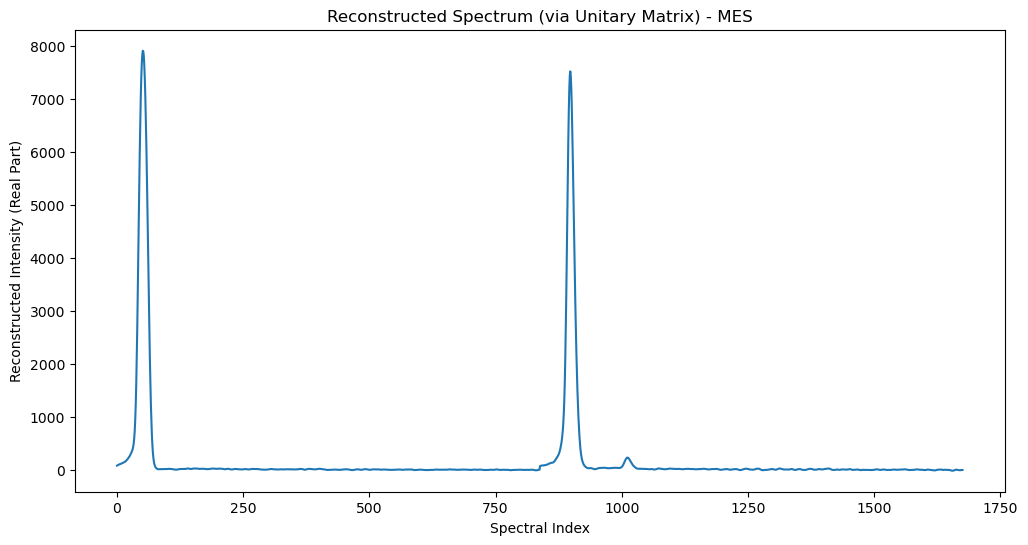

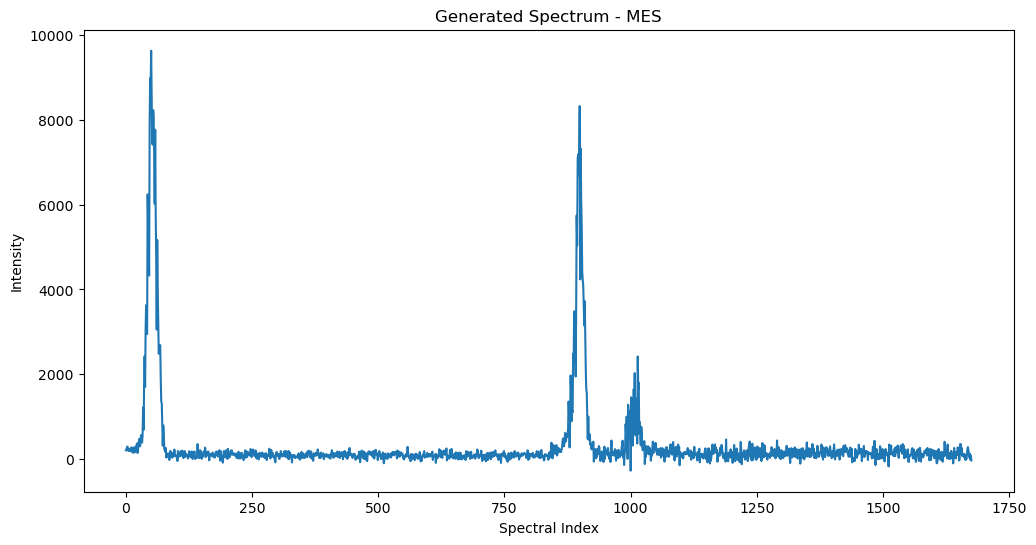

In [3]:
import pandas as pd
from scipy.stats import unitary_group

import matplotlib.pyplot as plt

# Load the feather file
df = pd.read_feather('/home/kjmetzler/train_data.feather')

# Select the 30th row (index 29)
row_30 = df.iloc[29]

# Exclude non-spectral columns (assuming spectral columns start with 'p_' or 'n_')
spectral_cols = [col for col in df.columns if col.startswith('p_') or col.startswith('n_')]
spectral_values = row_30[spectral_cols].values

plt.figure(figsize=(12, 6))
plt.plot(spectral_values)
plt.title('IMS training data - MES')
plt.xlabel('Spectral Index')
plt.ylabel('Intensity')
plt.show()

# Get only numerical spectral values from row_30
numerical_values = row_30[spectral_cols].astype(float).values
n_features = numerical_values.shape[0]

# Generate a random unitary matrix
U = unitary_group.rvs(n_features)

# Apply the unitary transformation
transformed = U @ numerical_values

# Plot the transformed spectrum (real part)
plt.figure(figsize=(12, 6))
plt.plot(transformed.real)
plt.title('Unitary Transformed Spectrum - MES')
plt.xlabel('Spectral Index')
plt.ylabel('Transformed Intensity (Real Part)')
plt.show()

# Reconstruct the original spectrum using the conjugate transpose of the unitary matrix
reconstructed = U.conj().T @ transformed

# Plot the reconstructed spectrum (real part)
plt.figure(figsize=(12, 6))
plt.plot(reconstructed.real)
plt.title('Reconstructed Spectrum (via Unitary Matrix) - MES')
plt.xlabel('Spectral Index')
plt.ylabel('Reconstructed Intensity (Real Part)')
plt.show()

# Load Steve's generated chemicals data
steve_generated = pd.read_csv('/home/kjmetzler/Steve_generated_U_chemicals_06252025.csv')

# Find the label for sample 30
sample_30_label = row_30.get('Label_U', row_30.get('Label'))

# Find the first sample in Steve's generated data with the same label
matching_sample = steve_generated[steve_generated['Label_U'] == sample_30_label].iloc[0]

# Extract spectral columns (same as spectral_cols)
generated_spectral_values = matching_sample[spectral_cols].astype(float).values

# Plot the spectrum
plt.figure(figsize=(12, 6))
plt.plot(generated_spectral_values)
plt.title(f"Generated Spectrum - MES")
plt.xlabel('Spectral Index')
plt.ylabel('Intensity')
plt.show()

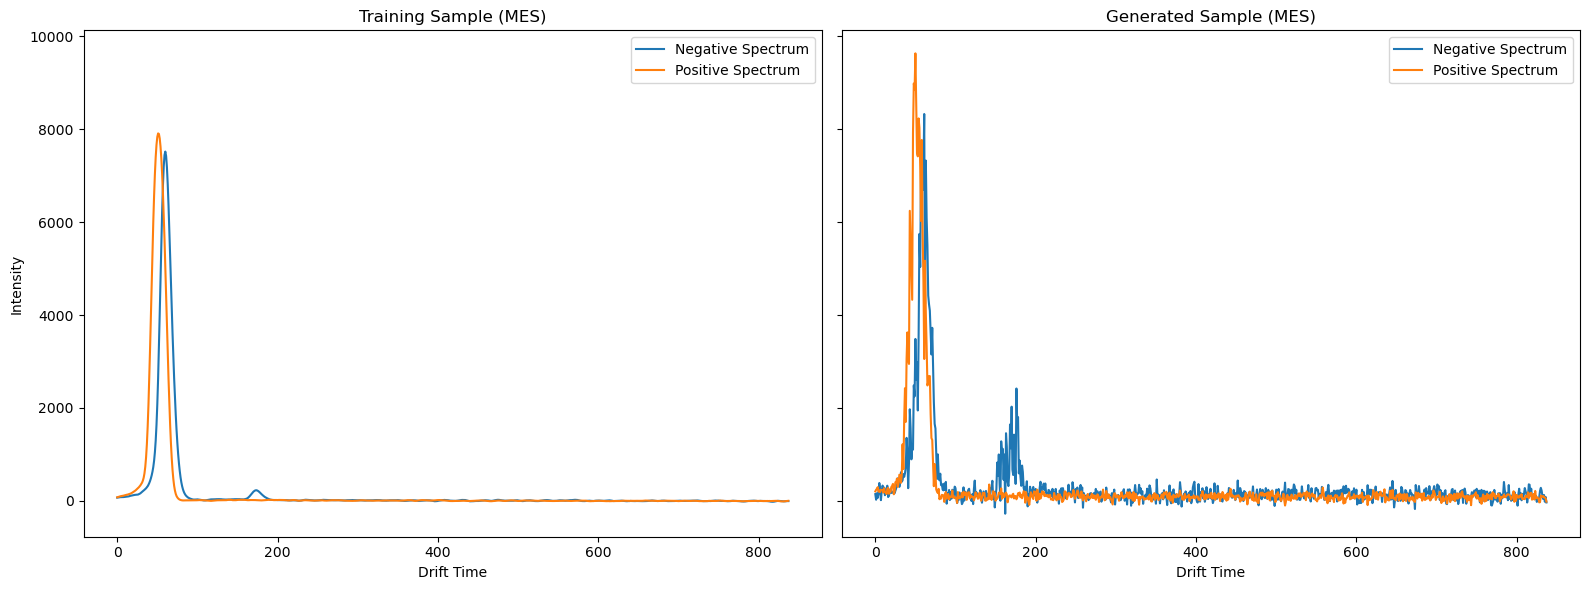

In [6]:
# Get positive and negative spectral columns
positive_cols = [col for col in spectral_cols if col.startswith('p_')]
negative_cols = [col for col in spectral_cols if col.startswith('n_')]

# Get values for training sample
train_pos = row_30[positive_cols].astype(float).values
train_neg = row_30[negative_cols].astype(float).values

# Get values for Steve's generated sample
steve_pos = matching_sample[positive_cols].astype(float).values
steve_neg = matching_sample[negative_cols].astype(float).values

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Training sample
axes[0].plot(train_neg, label='Negative Spectrum')
axes[0].plot(train_pos, label='Positive Spectrum')
axes[0].set_title('Training Sample (MES)')
axes[0].set_xlabel('Drift Time')
axes[0].set_ylabel('Intensity')
axes[0].legend()

# Steve's generated sample
axes[1].plot(steve_neg, label='Negative Spectrum')
axes[1].plot(steve_pos, label='Positive Spectrum')
axes[1].set_title("Generated Sample (MES)")
axes[1].set_xlabel('Drift Time')
axes[1].legend()

plt.tight_layout()
plt.show()